In [1]:
# 필요한 모듈 import

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

import tqdm
from ast import literal_eval
import numpy as np
from PIL import Image
%matplotlib inline 

In [2]:
def concat(x):
    w = []
    for i in range(len(x)):
        if x[i][1] == 'Noun' or x[i][1] == 'Number':
            try:
                if x[i-1][1] == 'Modifier':
                    pass
                else:
                    w.append(x[i][0])
            except:
                pass
        elif x[i][1] == 'Suffix':
            try:
                w.pop()
                w.append(x[i-1][0] + x[i][0])
            except:
                pass
        elif x[i][1] == 'Modifier':
            try:
                w.append(x[i][0] + x[i+1][0])
            except:
                pass
    return w

In [3]:
sd = pd.read_csv('서담_업데이트.txt', sep = '|',
                converters={'comment_num' : literal_eval, 'like': literal_eval,
                            'view' : literal_eval, 'dislike' : literal_eval,
                            'word_token' : literal_eval})


sd['w'] = sd['word_token'].apply(lambda x: concat(x))
sd

,Unnamed: 0,title,header,comment_num,writer,like,upload_date,view,link,borad,text,dislike,comment,date_time,hour,word_token,w
0,0,도대체가 학교의 기준이 무엇인지 이해가 안됩니다,NaN,14,익명,32,46분 전,429,http://www.ssodam.com//content/980179?prev=1&p...,CPA,교육부 방역수칙이 도대체 어떤 점에서 어떻게 미달이 되는데요? 이걸 알려주셔야죠미달...,0,[['근데 아직 확정?은 아니지 않나요 아직까지는 그냥 누군가가 그렇다더라니까 기다...,2020-08-13 19:01:00,19.0,"[(도대체, Noun), (가, Josa), (학교, Noun), (의, Josa)...","[도대체, 학교, 기준, 무엇, 이해]"
1,1,학교 시설물 관련 부서 전화번호 적을테니 내일부터 전화 한통씩하자,NaN,10,익명,38,48분 전,577,http://www.ssodam.com//content/980177?prev=1&p...,익게2,코로나 이후로 전화 자주하는편인데 나도 처음에 어디로 전화해야할지도 막막하고 그래서...,3,[['저런 곳보다 대책회의쪽이 더 확실할텐데 총학도 회의에 몇번 참관한걸로 아는데 ...,2020-08-13 18:59:00,18.0,"[(학교, Noun), (시설, Noun), (물, Noun), (관련, Noun)...","[학교, 시설, 물, 관련, 부서, 전화번호, 내일, 전화, 통씩, 하자]"
2,2,걍 서강사이버대학으로 하자,NaN,10,익명,42,55분 전,564,http://www.ssodam.com//content/980173?prev=1&p...,익게2,학교 부지는 외부인 등산하게 냅두고운동장 농구장은 외부인들한테 24시간 무료개방하고...,7,"[['그만•••'], ['뭘 그만하라는거야?'], ['이런 댓글이야 말로 그만......",2020-08-13 18:52:00,18.0,"[(걍, Adverb), (서강, Noun), (사이버, Noun), (대학, No...","[서강, 사이버, 대학, 하자]"
3,3,학교 너무 빡친다,쉐복,54,익명,106,18:24,1830,http://www.ssodam.com//content/980162?prev=1&p...,익게2,다른 학교는 감염 위험이 없어서 시설 개방하는 줄 아냐? 아니 등록금은 다 쳐받아놓...,13,"[['교육부 지침에 안맞으면 못여는건가?'], ['어떻게 다른대학들은 5~6월에 고...",2020-08-13 18:24:00,18.0,"[(학교, Noun), (너무, Adverb), (빡친다, Adjective)]",[학교]
4,4,박미선 누님 결혼식날 비 오셨죠?,NaN,2,익명,40,17:44,824,http://www.ssodam.com//content/980129?prev=1&p...,익게2,마지막 ㅋ 하나 붙인게 킬포ㅋㅋㅋ,1,"[['난 오셨다길래 정지훈 얘기하는 줄'], ['??? : 모르는데 어떻게가요'],...",2020-08-13 17:44:00,17.0,"[(박미선, Noun), (누님, Noun), (결혼식, Noun), (날, Nou...","[박미선, 누님, 결혼식, 날, 비]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8214,8214,새해맞이 연게 첫글,NaN,5,익명,35,01/01,785,http://www.ssodam.com//content/813081?prev=245...,연애상담소,다들 올해는 인생의 단짝을 만나용,0,[['네에 ㅠㅠ 올해는 정말 행복하고 싶어요.. 님두 좋은 인연 만나서 행복하세요 ...,2020-01-01 00:24:00,0.0,"[(새해, Noun), (맞이, Noun), (연, Noun), (게, Josa),...","[새해, 맞이, 연, 첫글]"
8215,8215,올해는 행시합격한다,NaN,5,익명,86,01/01,1180,http://www.ssodam.com//content/813062?prev=245...,익게2,토모관 여러분도\n\n\n \n\n \n ...,0,"[['나도 행시 올 해 붙는다!'], ['나도 올해 붙는다!'], ['민특상디 사례...",2020-01-01 00:08:00,0.0,"[(올해, Noun), (는, Josa), (행시, Noun), (합격, Noun)...","[올해, 행시, 합격]"
8216,8216,??? : 야 올해가 몇년이냐?,NaN,9,익명,127,01/01,1982,http://www.ssodam.com//content/813058?prev=245...,익게2,다들 새해복!,0,"[['좌우로 정렬해주세여'], ['ㅁㅊ ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 적절한 짤 추'], ['...",2020-01-01 00:06:00,0.0,"[(???, Punctuation), (:, Punctuation), (야, Exc...","[올해, 몇년]"
8217,8217,2020년 서강의 첫 모습,NaN,5,익명,101,01/01,1931,http://www.ssodam.com//content/813047?prev=245...,익게2,방금 토모관에서 나와서 찍어봤어20대의 절반을 서강과 함께할수 있어서 진심으로 행복...,0,"[['나도 방금 나왔는데 ㅎㅎㅎ 다미 본듯'], ['내년에는 좋은 소식만 들리자!!...",2020-01-01 00:04:00,0.0,"[(2020년, Number), (서강, Noun), (의, Josa), (첫, N...","[2020년, 서강, 첫, 모습]"


In [4]:
def monthly (x) :
    if ':' in x:
        return int(8)
    else :
        return int(x[1])

In [5]:
sd['month'] = sd.upload_date.apply(lambda x : monthly(x))
sd

,Unnamed: 0,title,header,comment_num,writer,like,upload_date,view,link,borad,text,dislike,comment,date_time,hour,word_token,w,month
0,0,도대체가 학교의 기준이 무엇인지 이해가 안됩니다,NaN,14,익명,32,46분 전,429,http://www.ssodam.com//content/980179?prev=1&p...,CPA,교육부 방역수칙이 도대체 어떤 점에서 어떻게 미달이 되는데요? 이걸 알려주셔야죠미달...,0,[['근데 아직 확정?은 아니지 않나요 아직까지는 그냥 누군가가 그렇다더라니까 기다...,2020-08-13 19:01:00,19.0,"[(도대체, Noun), (가, Josa), (학교, Noun), (의, Josa)...","[도대체, 학교, 기준, 무엇, 이해]",6
1,1,학교 시설물 관련 부서 전화번호 적을테니 내일부터 전화 한통씩하자,NaN,10,익명,38,48분 전,577,http://www.ssodam.com//content/980177?prev=1&p...,익게2,코로나 이후로 전화 자주하는편인데 나도 처음에 어디로 전화해야할지도 막막하고 그래서...,3,[['저런 곳보다 대책회의쪽이 더 확실할텐데 총학도 회의에 몇번 참관한걸로 아는데 ...,2020-08-13 18:59:00,18.0,"[(학교, Noun), (시설, Noun), (물, Noun), (관련, Noun)...","[학교, 시설, 물, 관련, 부서, 전화번호, 내일, 전화, 통씩, 하자]",8
2,2,걍 서강사이버대학으로 하자,NaN,10,익명,42,55분 전,564,http://www.ssodam.com//content/980173?prev=1&p...,익게2,학교 부지는 외부인 등산하게 냅두고운동장 농구장은 외부인들한테 24시간 무료개방하고...,7,"[['그만•••'], ['뭘 그만하라는거야?'], ['이런 댓글이야 말로 그만......",2020-08-13 18:52:00,18.0,"[(걍, Adverb), (서강, Noun), (사이버, Noun), (대학, No...","[서강, 사이버, 대학, 하자]",5
3,3,학교 너무 빡친다,쉐복,54,익명,106,18:24,1830,http://www.ssodam.com//content/980162?prev=1&p...,익게2,다른 학교는 감염 위험이 없어서 시설 개방하는 줄 아냐? 아니 등록금은 다 쳐받아놓...,13,"[['교육부 지침에 안맞으면 못여는건가?'], ['어떻게 다른대학들은 5~6월에 고...",2020-08-13 18:24:00,18.0,"[(학교, Noun), (너무, Adverb), (빡친다, Adjective)]",[학교],8
4,4,박미선 누님 결혼식날 비 오셨죠?,NaN,2,익명,40,17:44,824,http://www.ssodam.com//content/980129?prev=1&p...,익게2,마지막 ㅋ 하나 붙인게 킬포ㅋㅋㅋ,1,"[['난 오셨다길래 정지훈 얘기하는 줄'], ['??? : 모르는데 어떻게가요'],...",2020-08-13 17:44:00,17.0,"[(박미선, Noun), (누님, Noun), (결혼식, Noun), (날, Nou...","[박미선, 누님, 결혼식, 날, 비]",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8214,8214,새해맞이 연게 첫글,NaN,5,익명,35,01/01,785,http://www.ssodam.com//content/813081?prev=245...,연애상담소,다들 올해는 인생의 단짝을 만나용,0,[['네에 ㅠㅠ 올해는 정말 행복하고 싶어요.. 님두 좋은 인연 만나서 행복하세요 ...,2020-01-01 00:24:00,0.0,"[(새해, Noun), (맞이, Noun), (연, Noun), (게, Josa),...","[새해, 맞이, 연, 첫글]",1
8215,8215,올해는 행시합격한다,NaN,5,익명,86,01/01,1180,http://www.ssodam.com//content/813062?prev=245...,익게2,토모관 여러분도\n\n\n \n\n \n ...,0,"[['나도 행시 올 해 붙는다!'], ['나도 올해 붙는다!'], ['민특상디 사례...",2020-01-01 00:08:00,0.0,"[(올해, Noun), (는, Josa), (행시, Noun), (합격, Noun)...","[올해, 행시, 합격]",1
8216,8216,??? : 야 올해가 몇년이냐?,NaN,9,익명,127,01/01,1982,http://www.ssodam.com//content/813058?prev=245...,익게2,다들 새해복!,0,"[['좌우로 정렬해주세여'], ['ㅁㅊ ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 적절한 짤 추'], ['...",2020-01-01 00:06:00,0.0,"[(???, Punctuation), (:, Punctuation), (야, Exc...","[올해, 몇년]",1
8217,8217,2020년 서강의 첫 모습,NaN,5,익명,101,01/01,1931,http://www.ssodam.com//content/813047?prev=245...,익게2,방금 토모관에서 나와서 찍어봤어20대의 절반을 서강과 함께할수 있어서 진심으로 행복...,0,"[['나도 방금 나왔는데 ㅎㅎㅎ 다미 본듯'], ['내년에는 좋은 소식만 들리자!!...",2020-01-01 00:04:00,0.0,"[(2020년, Number), (서강, Noun), (의, Josa), (첫, N...","[2020년, 서강, 첫, 모습]",1


In [6]:
m = sd.month.value_counts().sort_index(ascending=True)
label = list(m.index)

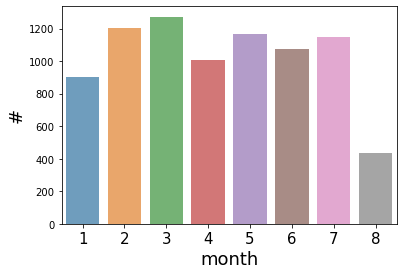

In [7]:
ax = sns.barplot(x = label, y = m, alpha = 0.7)

ax.set_xticklabels(labels= label, fontsize=15)
ax.set_xlabel("month", fontsize = 18)
ax.set_ylabel("#", fontsize = 18)
plt.show()

## 워드클라우드

In [8]:
from konlpy.tag import Kkma
from konlpy.tag import Okt
from konlpy.tag import Twitter

kkma = Kkma()
o = Okt()
t = Twitter()

icon = Image.open('circle.png')
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)
rc('font', family='NanumBarunGothic')

c:\users\samsung\appdata\local\programs\python\python37\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [9]:
def mk_cloud (month) :
    # 월별 키워드 추출
    target = sd[sd['month']== month]
    tokenized_nouns = [list(zip((sentence),(sentence)[1:])) for sentence in target.w.values]

    counter = Counter()
    for i in tokenized_nouns: 
        counter.update(Counter(i))
    mc = counter.most_common()
    
    wlist = []
    for i in mc:
        wlist.extend([i[0][0]+i[0][1]]* i[1])
    
    # 워드클라우드 
    wcloud = ' '.join(wlist)
    fname = 'fig'+str(month)+'.png'
    
    text = wcloud
    wordcloud = WordCloud(max_font_size=200, font_path ="c:/Windows/Fonts/malgun.ttf",
                      min_font_size = 20, mask = mask,
                      width=400, height=200, colormap = 'summer',
                     margin = 2,collocations=False, 
                      background_color = 'white').generate(text)
    
    fig = plt.figure(figsize = (30,30) )
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show
    plt.savefig(fname)
    
    return

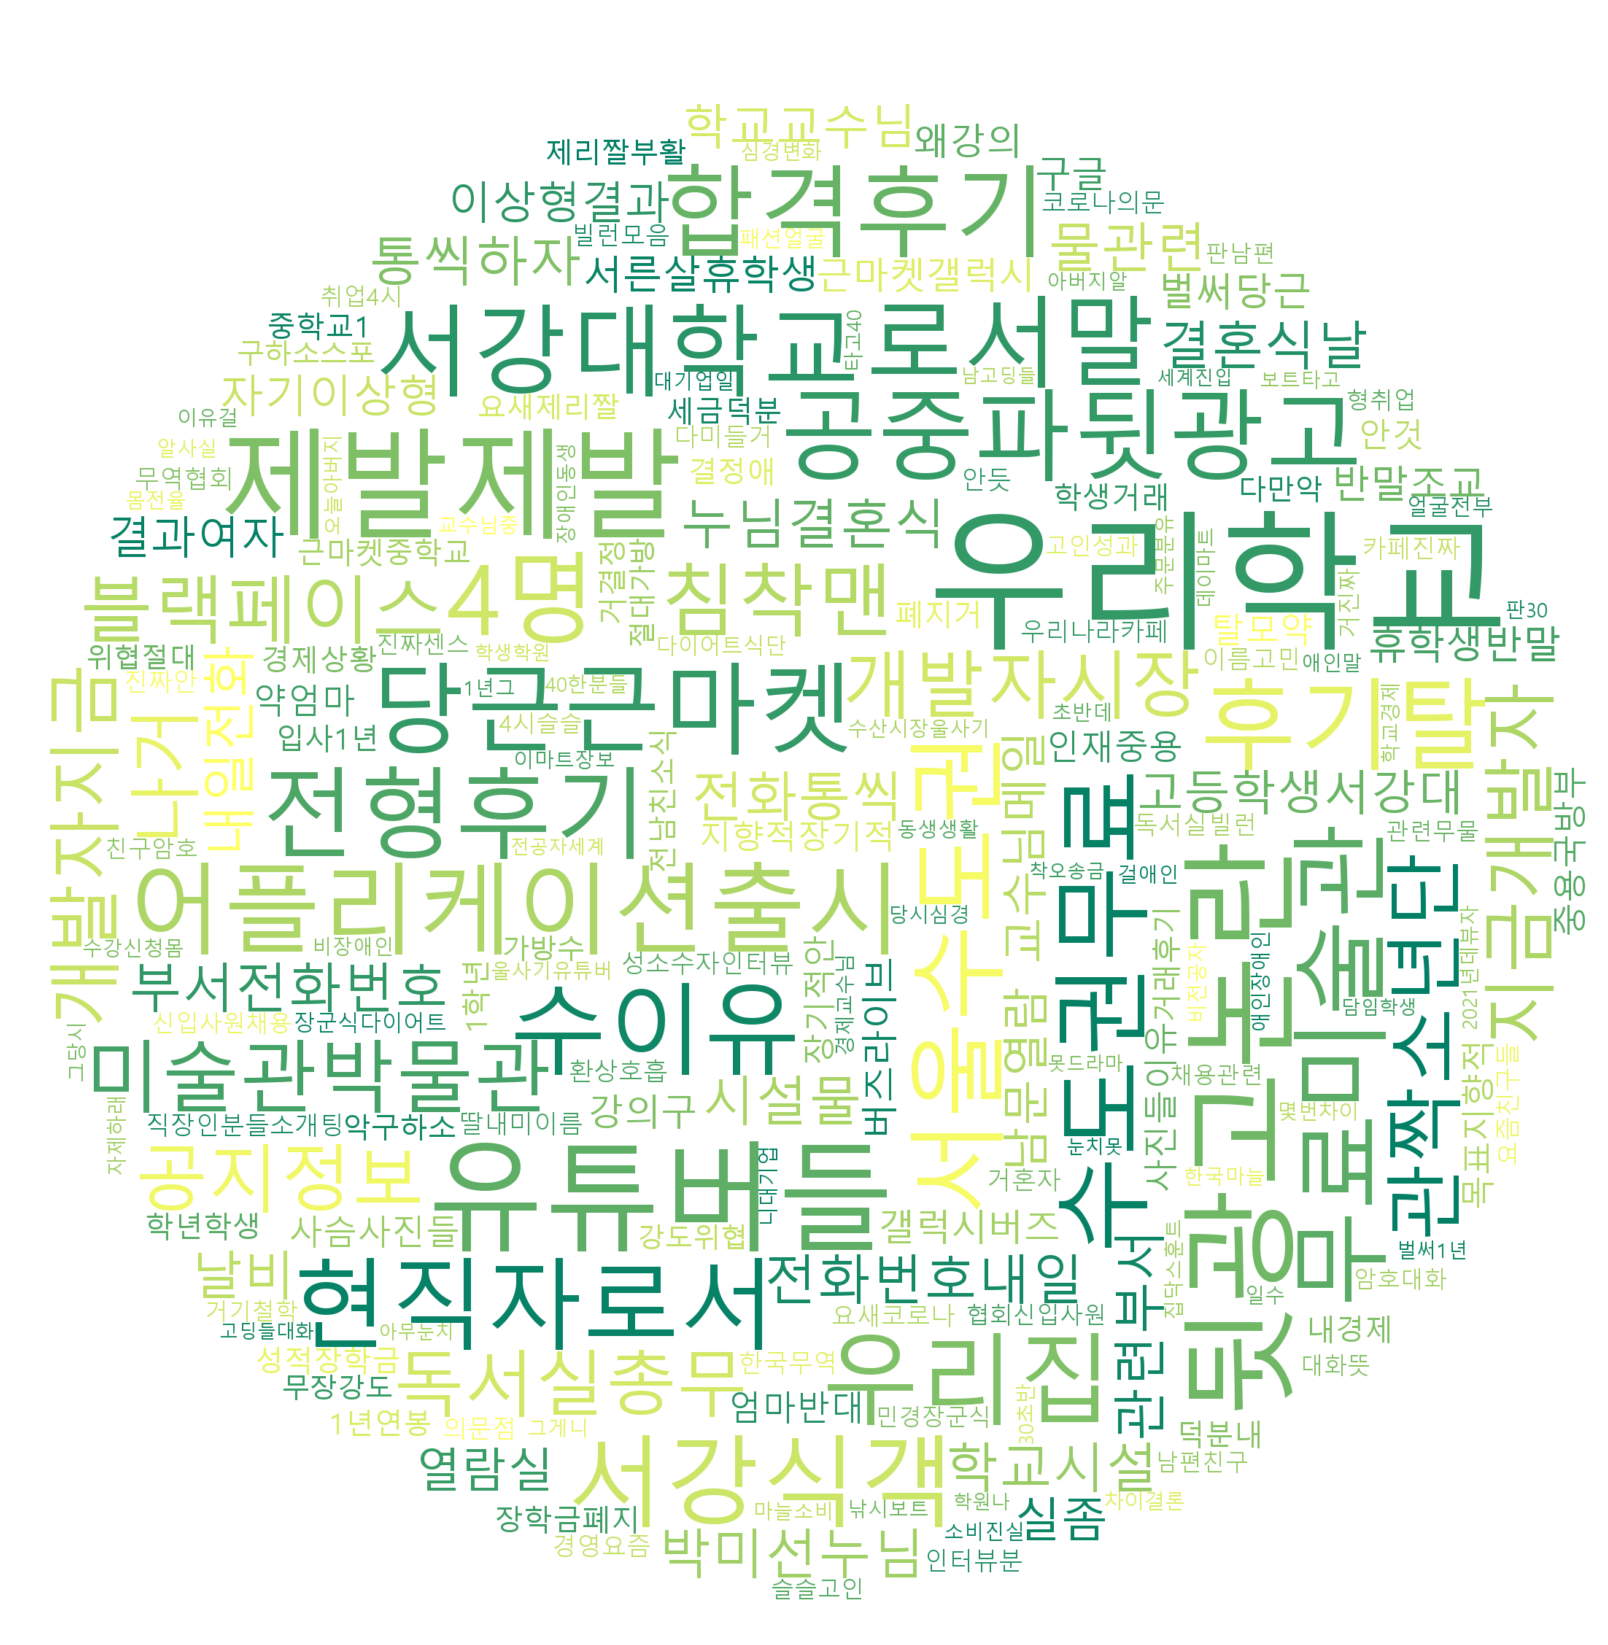

In [10]:
mk_cloud(8)